In [2]:
import os
os.getcwd()

'C:\\Users\\woosung\\Anaconda3\\envs\\GJ_ACE\\수업자료\\고급과정\\Deep Learning'

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt
from  PIL import Image

In [5]:
img = Image.open('dataset/flowers/daisy/100080576_f52e8ee070_n.jpg')
print('img:', img)

img: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x263 at 0x2A572A2AEE0>


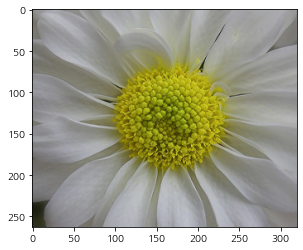

img_array:
 (263, 320, 3)
img_array:
 [[[135 135 133]
  [138 138 136]
  [142 142 142]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[134 134 132]
  [137 137 135]
  [141 141 139]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[133 133 131]
  [136 136 134]
  [141 141 139]
  ...
  [153 153 153]
  [155 155 155]
  [146 146 146]]

 ...

 [[ 45  48  27]
  [ 44  47  26]
  [ 44  47  26]
  ...
  [130 126 125]
  [130 126 125]
  [129 125 124]]

 [[ 44  47  26]
  [ 44  47  26]
  [ 44  47  26]
  ...
  [130 126 125]
  [130 126 125]
  [130 126 125]]

 [[ 44  47  26]
  [ 44  47  26]
  [ 44  47  26]
  ...
  [132 128 127]
  [132 128 127]
  [132 128 127]]]


In [11]:
plt.imshow(img)
plt.show()

img_array = np.array(img)
print('img_array:\n', img_array.shape)
print('img_array:\n',img_array)

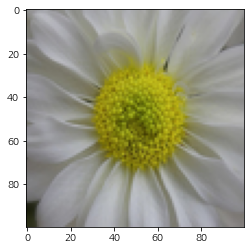

In [14]:
resized = img.resize([100,100])
plt.imshow(resized)
plt.show()

In [16]:
path = 'dataset/flowers/'
filenames = os.listdir(path)
print('filenames:', filenames)

filenames: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [40]:
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    
    return filenames

In [41]:
target_names = list_dir(path)
target_names[:2]

['daisy', 'dandelion']

In [44]:
for dx, dname in enumerate(target_names):
    print("dname : ", dname)
    
    subpath = path + dname
    print("subpath : ", subpath)
    
    filenames = list_dir(subpath)
    print('filenames: \n:',filenames[:3])

dname :  daisy
subpath :  dataset/flowers/daisy
filenames: 
: ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath :  dataset/flowers/dandelion
filenames: 
: ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath :  dataset/flowers/rose
filenames: 
: ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath :  dataset/flowers/sunflower
filenames: 
: ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath :  dataset/flowers/tulip
filenames: 
: ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [48]:
imagepath = os.path.join(subpath, filenames[2])
print("imagepath : ", imagepath)

imagepath :  dataset/flowers/tulip\10094731133_94a942463c.jpg


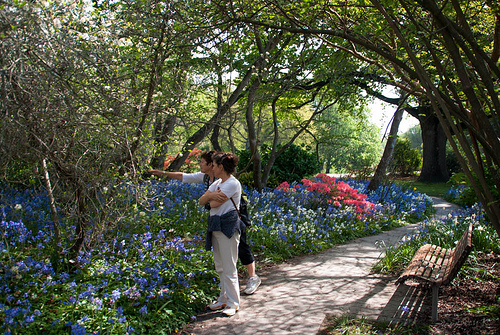

In [49]:
img = Image.open(imagepath)
img

In [50]:
def load_image_pixels(imagepath, resolution):
    img         = Image.open(imagepath)
    img_resized = img.resize(resolution)
    return np.array(img_resized)

In [51]:
resolution = [100,100]

pixels = load_image_pixels(imagepath, resolution)
print("pixels : \n", pixels)

pixels : 
 [[[ 73  72  71]
  [113 118  98]
  [118 128  84]
  ...
  [ 40  38  22]
  [ 46  50  12]
  [ 67  72  26]]

 [[102 109  44]
  [ 98  97  83]
  [105 104  80]
  ...
  [ 93  85  85]
  [ 44  45   9]
  [ 60  66  23]]

 [[115 126  60]
  [145 149 152]
  [185 189 184]
  ...
  [150 154  97]
  [ 65  68  14]
  [ 51  57   9]]

 ...

 [[ 27  47  49]
  [ 32  46  25]
  [ 26  46  36]
  ...
  [ 61  50  46]
  [ 47  36  33]
  [ 24  17  13]]

 [[ 20  35  11]
  [ 63  59  54]
  [ 40  55  28]
  ...
  [ 43  33  32]
  [ 59  42  38]
  [ 33  21  18]]

 [[ 34  54  39]
  [ 28  52  98]
  [ 27  46  34]
  ...
  [ 60  53  42]
  [ 67  49  46]
  [ 23  16  15]]]


In [52]:
def flowers_init(resolution):
    path         = 'dataset/flowers/'
    target_names = list_dir(path=path)
    
    images = []
    idxs   = []
    
    for dx, dname in enumerate(target_names):
        print("dname : ", dname)

        subpath = path + dname
        print("subpath : ", subpath)

        filenames = list_dir(subpath)
        print("filenames : \n", filenames[:3])    
        
        for fname in filenames:
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            
            idxs.append(dx)
            
    xs = np.asarray(images, dtype=np.float32)
    
    return xs, images, idxs
            
            
            
        

In [53]:
resolution = [100, 100]
xs, images, idxs = flowers_init(resolution=resolution)

dname :  daisy
subpath :  dataset/flowers/daisy
filenames : 
 ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath :  dataset/flowers/dandelion
filenames : 
 ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath :  dataset/flowers/rose
filenames : 
 ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath :  dataset/flowers/sunflower
filenames : 
 ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath :  dataset/flowers/tulip
filenames : 
 ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [55]:
print(idxs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [56]:
pd.Series(idxs).value_counts()

1    1052
4     984
2     784
0     764
3     733
dtype: int64

In [58]:
print('xs.shape:' , xs.shape)

xs.shape: (4317, 100, 100, 3)


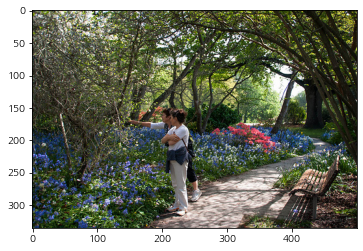

In [61]:
img_image = Image.fromarray(np.uint8(img))

plt.imshow(img_image)
plt.show()